In [1]:
import bs4 as bs
import textblob
import matplotlib.pyplot as plt
import seaborn as sns
import re
import urllib.request    

In [2]:
source = urllib.request.urlopen('https://www.reuters.com/article/us-global-coffee-poll/coffee-prices-seen-rising-nearly-25-percent-by-year-end-reuters-poll-idUSKCN1Q11JD').read()
soup = bs.BeautifulSoup(source,'lxml')
# title of the page
print(soup.title)

<title>
                Coffee prices seen rising nearly 25 percent by year-end: Reuters poll - Reuters</title>


In [3]:
# get attributes:
print(soup.title.name)

title


In [4]:
# get values:
print(soup.title.string)


                Coffee prices seen rising nearly 25 percent by year-end: Reuters poll - Reuters


In [5]:
# beginning navigation:
print(soup.title.parent.name)

head


In [6]:
for Pr in soup.find_all('p'):
    # print(paragraph.string)
    Pr = str(Pr.text)
    print(Pr)

3 Min Read
NEW YORK (Reuters) - Arabica coffee prices will rise nearly 20 percent by the end of 2019 as Brazil’s shift to an off-year in its biennial production cycle helps swing the world into a global deficit, a Reuters poll of nine traders and analysts showed on Tuesday. 
The survey participants anticipate a global deficit of 1 million 60-kg bags in 2019/20, according to the median forecast, compared to estimates of a 4.25 million-bag surplus for 2018/19.  
Tightening global supplies in the coming season are expected to lift arabica prices to $1.25 per pound by the end of 2019, 24.8 percent above Monday’s close. 
“Arabica prices should find some support by the fact that 2019/20 is set to be an ‘off year’ output in Brazil,” said Caroline Bain, analyst at Capital Economics.  
Respondents expect the 2019/20 crop for top producer Brazil at a median 55 million bags, little changed from previous forecasts.  
This represents a decline of about 8.3 percent from the record 2018/19 crop, whos

In [14]:
Paragraph_data = ""
sentiment=[]
for Pr in soup.find_all('p'):
    Pr = Pr.text
    Pr = re.sub('[h]+[t]+[t]+[p]+[a-z0-9A-Z./:]+','',Pr) # removing url
    print(Pr)
    Paragraph_data = Paragraph_data+' '+Pr
    Pr = textblob.TextBlob(Pr)
    if Pr.sentiment.polarity>0.01:
        print("positive")
        sentiment.append("positive")
    elif Pr.sentiment.polarity<-0.01:
        print("negative")
        sentiment.append("negative")
    else:
        print("Neutral")
        sentiment.append("neutral")
    print(" ")

3 Min Read
Neutral
 
NEW YORK (Reuters) - Arabica coffee prices will rise nearly 20 percent by the end of 2019 as Brazil’s shift to an off-year in its biennial production cycle helps swing the world into a global deficit, a Reuters poll of nine traders and analysts showed on Tuesday. 
positive
 
The survey participants anticipate a global deficit of 1 million 60-kg bags in 2019/20, according to the median forecast, compared to estimates of a 4.25 million-bag surplus for 2018/19.  
Neutral
 
Tightening global supplies in the coming season are expected to lift arabica prices to $1.25 per pound by the end of 2019, 24.8 percent above Monday’s close. 
negative
 
“Arabica prices should find some support by the fact that 2019/20 is set to be an ‘off year’ output in Brazil,” said Caroline Bain, analyst at Capital Economics.  
Neutral
 
Respondents expect the 2019/20 crop for top producer Brazil at a median 55 million bags, little changed from previous forecasts.  
positive
 
This represents a 

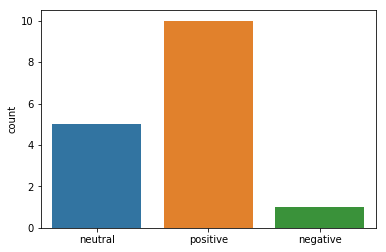

In [8]:
sns.countplot(sentiment)
plt.savefig('static/plot2.jpg')
plt.show()

In [9]:
# pip install wordcloud
import wordcloud
wd = wordcloud.WordCloud(max_words=10).generate_from_text(Paragraph_data)

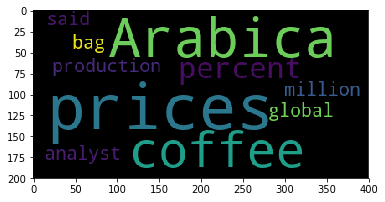

In [10]:
plt.imshow(wd)
plt.savefig('static/wordcloud2.jpg')
plt.show()

# my code

fnfhn